# Is a given financial transaction fraudulent?

![](images/fraud_transaction.png)

### OVERVIEW

Fraudulent financial activities lead to significant financial losses for individuals, businesses, and organizations. As the volume and complexity of financial transaction data increases, manual detection of anomalies becomes impractical and insufficient. To address this problem, unusual patterns in financial transaction data (indication of fraudulent activity) can be detected by utilizing Machine Learning techniques.

Proactive identification of a financial transaction as fraudulent will help in timely mitigation of its impact. Businesses can proactively intercept fraudulent transactions before they cause harm. This means faster response, reduced losses, and stronger protection for both customers and enterprises

### Data Source

The dataset comes from the Kaggle dataset repository [here](https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset/data). The data is generated by [PaySim: A financial mobile money simulator for fraud detection](https://www.researchgate.net/profile/Stefan-Axelsson/publication/313138956_PAYSIM_A_FINANCIAL_MOBILE_MONEY_SIMULATOR_FOR_FRAUD_DETECTION/links/5890f87e92851cda2568a295/PAYSIM-A-FINANCIAL-MOBILE-MONEY-SIMULATOR-FOR-FRAUD-DETECTION.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ&__cf_chl_tk=W6mmz0uF1h2LAgdN9YA_YkMzBmVw4j2fKjadfzHnSJ8-1743777820-1.0.1.1-GwSaNkozXl7WB1SkUEOIHm1RExZXrWkE_jsAwntzho4).

### <mark>A. Data Understanding</mark>

Exploring the data to understand volume, features, data types, limits, class imbalance etc.

<b>A. Steps to understand the data:</b>
1. Explore the data using Pandas Dataframe and its supported functions like info() for schema and datatype info and describe() for basic statistical information.
2. Find features with missing values.
3. Identify numeric and categorical features.
4. Identify class imbalance.
5. Perform <b>Exploratory Data Analysis (EDA)</b> on the dataset by generating appropriate plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [2]:
# A.1 Load the data and review
transaction_df = pd.read_csv('data/AIML Dataset.csv')
transaction_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


<b><mark>Dataset Deatils</mark></b>
- Total records = 6,362,619
- Total features = 11

<b><mark>Understanding the features in the dataset</mark></b>
1. step - portion of the time period
2. type - Type of the transaction
3. amount - Amount of the transaction
4. nameOrig - Name of the source account
5. oldbalanceOrg - Old balance of source account (pre-transaction)
6. newbalanceOrig - New balance of source account (post-transaction)
7. nameDest - Name of the destination account
8. oldbalanceDest - Old balance of destination account (pre-transaction)
9. newbalanceDest - New balance of destination account (post-transaction)
10. <b>isFraud</b> - Is the transaction fraud? (1 means Fraud; 0 means its not) <mark>*** THIS WILL BE THE <b>DEPENDENT VARIABLE</b> FOR MODELING ***</mark>
11. isFlaggedFraud - Was the system able to flag the transaction as fraud or not (1 means flagged as fraud; 0 means it was not flagged as fraud)

In [3]:
# A.1.1 Finding summary of the dataset (schema with datatypes)
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<b><mark>Feature Data Types:</mark></b>
- Numeric Feature Count = 8 ; float64 (5) and int64 (3)
- Non-numerical Feature Count = 3 ; object (3) <mark>(type, nameOrig, nameDest)</mark>

<mark>Non-numeric features:</mark>
- Source Account Name (nameOrig) and Destination Account Name (nameDest)
- Transaction Type (type)

In [4]:
# A.1.2 Understanding the types of transactions
unique_transaction_types = transaction_df['type'].unique()
print(f"Number of unique transaction types: {len(unique_transaction_types)}")
print(f"Unique transaction types: {unique_transaction_types}")

Number of unique transaction types: 5
Unique transaction types: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


<b><mark>Transaction Types:</mark></b> 
1. PAYMENT - money going out (balance reduction)
2. TRANSFER - money going out (balance reduction)
3. CASH_OUT - money going out (balance reduction)
4. DEBIT - money going out (balance reduction)
5. CASH_IN - money coming in (balance increase)

In [5]:
# A.1.3 Finding statistical summary of the dataset
transaction_df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


<b><mark>Interesting observations from the statistical summary of the dataset:</mark></b>
- Minimum transaction amount = 0
- Minimum pre-transaction balance amount = 0
- Maximum transaction amount = ~92,445,516
- Maximum pre-transaction balance amount = ~59,585,040

In [6]:
# Zero amount transactions
zero_tran_df = transaction_df.query("amount == 0")
print(f"Zero amount transaction count = {len(zero_tran_df)}")
zero_tran_df

Zero amount transaction count = 16


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


<b><mark>All the 16 zero amount transactions are cash out transactions and are lebeled as fraud.</mark></b>

In [7]:
# Zero pre-transaction balance
zero_prebal_df = transaction_df.query("oldbalanceOrg == 0")
print(f"Zero amount transaction count = {len(zero_prebal_df)}")
zero_prebal_df

Zero amount transaction count = 2102449


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,0.00,0.00,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,0.00,0.00,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,0.00,0.00,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,0.00,0.00,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,0.00,0.00,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0


In [8]:
# maximum transaction amount (~92,445,516)
max_tran_amt = transaction_df['amount'].max()
max_tran_df = transaction_df.query('amount == @max_tran_amt')
print(f"Max amount transaction count = {len(max_tran_df)}")
max_tran_df

Max amount transaction count = 1


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0


In [9]:
# A.2 Finding the missing values for each feature
transaction_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<b><mark>NOTE: There are no missing values for any feature</mark></b>

In [10]:
# A.3 Categorical features in the dataset
print("Non-numerical Features:")
count=0
for column_name in transaction_df:
    if transaction_df[column_name].dtype == 'object':
        count = count+1
        print(f"{count} Feature Name: {column_name}")
        unique_values = transaction_df[column_name].unique()
        print(f"Number of unique values of {column_name}: {len(unique_values)}")
        if len(unique_values) < 10:
            print(f"Unique values of {column_name}: {unique_values}")

Non-numerical Features:
1 Feature Name: type
Number of unique values of type: 5
Unique values of type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
2 Feature Name: nameOrig
Number of unique values of nameOrig: 6353307
3 Feature Name: nameDest
Number of unique values of nameDest: 2722362


<mark>The only <b>Categorical feature in the data is 'type'</b> with following values</mark> 
1. PAYMENT
2. TRANSFER
3. CASH_OUT
4. DEBIT
5. CASH_IN

In [11]:
# A.4 Class Imbalance
transaction_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<b>Class Imbalance: </b>
<mark>The dataset is highly imbalanced with only <b>8,213 records labeled as fraud</b> and <b>6,354,407 records labeled as normal</b> (not fraud).</mark>
- Total records = 6,362,619
- Labeled as fraud = 8,213

Fraud Class = <b>0.13%</b>
Normal Class = <b>99.87%</b>

<b>A.5 <mark>Exploratory Data Analysis (EDA) </mark></b>

In [12]:
# Dataset with only fraud transactions
fraud_df = transaction_df.query("isFraud == 1")
fraud_df.reset_index(drop=True, inplace=True)

In [13]:
# A.5.1.0 Histogram by 'type'
fig = px.histogram(transaction_df, x="type", text_auto=True)
fig.update_layout(title={'text': 'A.5.1.0 - Histogram by transactions type','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Transaction Type', yaxis_title_text='Transaction Count')
fig.write_image("images/A.5.1.0_histogram_transaction_type.png")
fig.write_html("plots/A.5.1.0_histogram_transaction_type.html")
#fig.show() # commented to reduce notebook file size as the record count is very high (6.3 million)

![](images/A.5.1.0_histogram_transaction_type.png)

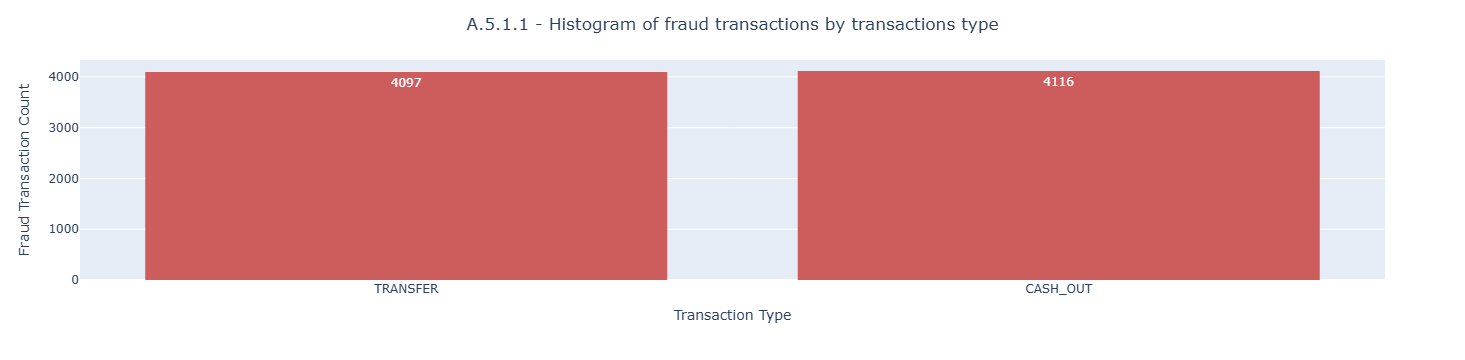

In [14]:
# A.5.1.1 Histogram by 'type' for fraud transactions only
fig = px.histogram(fraud_df, x="type", text_auto=True, color_discrete_sequence=['indianred'])
fig.update_layout(title={'text': 'A.5.1.1 - Histogram of fraud transactions by transactions type','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Transaction Type', yaxis_title_text='Fraud Transaction Count')
fig.write_image("images/A.5.1.1_histogram_fraud_transaction_type.png")
fig.write_html("plots/A.5.1.1_histogram_fraud_transaction_type.html")
fig.show()

In [15]:
# A.5.1.1 Histogram by 'type' for all transactions and fraud transactions side-by-side
fig = go.Figure()
fig.add_trace(go.Histogram(x=transaction_df['type'], name="All Transactions", texttemplate="%{y:d}"))
fig.add_trace(go.Histogram(x=fraud_df['type'], name="Fraud Transactions", texttemplate="%{y:d}"))
fig.update_layout(title={'text': 'A.5.1.2 - Histogram by transactions type (all vs fraud)','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Transaction Type', yaxis_title_text='Transaction Count')
fig.write_image("images/A.5.1.2_histogram_transaction_type_allvsfraud.png")
fig.write_html("plots/A.5.1.21_histogram_transaction_type_allvsfraud.html")
#fig.show() # commented to reduce notebook file size as the record count is very high (6.3 million)

![](images/A.5.1.2_histogram_transaction_type_allvsfraud.png)
<center><mark><b>Chart above is a visual representation of isFraud feature class imbalance</b></mark></center>

In [ ]:
# A.5.2.0 Scatter plot of transcation amount against source account pre-transaction balance (for all transactions)
fig = px.scatter(transaction_df, x='amount', y='oldbalanceOrg')
fig.update_layout(xaxis_title="Transaction Amount", yaxis_title="Pre-transaction Balance", 
                  title={'text': 'A.5.2.0 - Scatter plot of transaction amount against source account pre-transaction balance','x': 0.5,'xanchor': 'center'})
fig.write_image("images/A.5.2.0_scatter_plot_transcation-amount_against_pre-transaction_balance.png")
fig.write_html("plots/A.5.2.0_scatter_plot_transcation-amount_against_pre-transaction_balance.html")
#fig.show() # commented to reduce notebook file size as the record count is very high (6.3 million)

![](images/A.5.2.0_scatter_plot_transcation-amount_against_pre-transaction_balance.png)

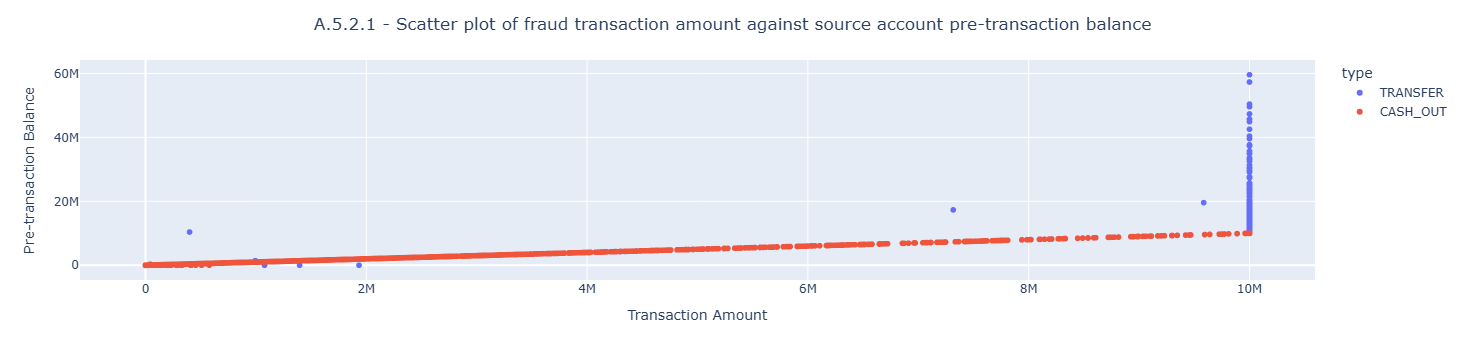

In [15]:
# A.5.2.1 Scatter plot of transcation amount against source account pre-transaction balance (for fraud transactions only)
fig = px.scatter(fraud_df, x='amount', y='oldbalanceOrg', color='type')
fig.update_layout(xaxis_title="Transaction Amount", yaxis_title="Pre-transaction Balance", 
                  title={'text': 'A.5.2.1 - Scatter plot of fraud transaction amount against source account pre-transaction balance','x': 0.5,'xanchor': 'center'})
fig.write_image("images/A.5.2.1_scatter_plot_fraud-transcation-amount_against_pre-transaction_balance.png")
fig.write_html("plots/A.5.2.1_scatter_plot_fraud-transcation-amount_against_pre-transaction_balance.html")
fig.show()

In [15]:
# A.5.3.0 Histogram of log (transcation amount +1) against count
fig = px.histogram(np.log1p(transaction_df['amount']), nbins=1000, range_x=[0, 18])
fig.update_layout(xaxis_title="log (Transaction Amount +1)", yaxis_title="Count", 
                  title={'text': 'A.5.3.0 - Histogram of transaction amount distribution','x': 0.5,'xanchor': 'center'})
fig.write_image("images/A.5.3.0_histogram_transaction_amount_distribution.png")
fig.write_html("plots/A.5.3.0_histogram_transaction_amount_distribution.html")
#fig.show() # commented to reduce notebook file size as the record count is very high (6.3 million)

![](images/A.5.3.0_histogram_transaction_amount_distribution.png)

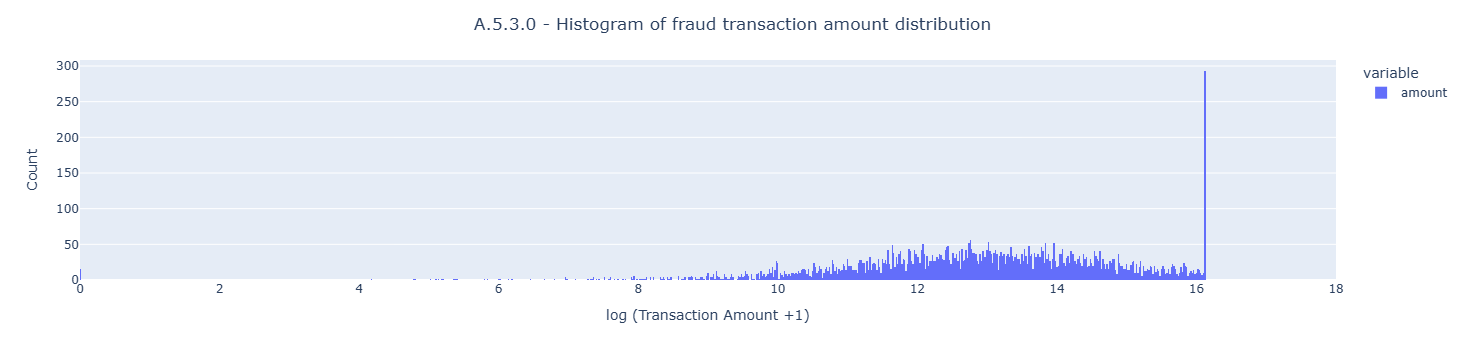

In [16]:
# A.5.3.1 Histogram of log (transcation amount +1) against count (for fraud transactions only)
fig = px.histogram(np.log1p(fraud_df['amount']), nbins=1000, range_x=[0, 18])
fig.update_layout(xaxis_title="log (Transaction Amount +1)", yaxis_title="Count", 
                  title={'text': 'A.5.3.0 - Histogram of fraud transaction amount distribution','x': 0.5,'xanchor': 'center'})
fig.write_image("images/A.5.3.1_histogram_fraud_transaction_amount_distribution.png")
fig.write_html("plots/A.5.3.1_histogram_fraud_transaction_amount_distribution.html")
fig.show()

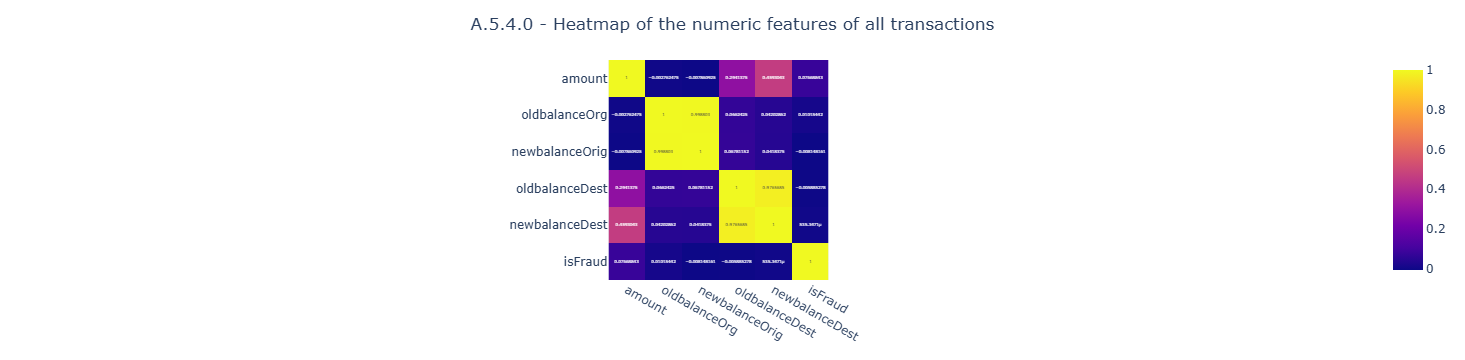

In [17]:
# A.5.4.0 Heatmap of the numeric features of entire transaction dataset to explore corelation
df_numeric = transaction_df.select_dtypes(include=np.number)
df_numeric.drop('step', axis=1, inplace=True)
df_numeric.drop('isFlaggedFraud', axis=1, inplace=True)
#df_numeric = df_numeric.set_index('id')
fig = px.imshow(df_numeric.corr(), text_auto=True)
fig.update_layout(title={'text': 'A.5.4.0 - Heatmap of the numeric features of all transactions','x': 0.5,'xanchor': 'center'})
fig.write_image("images/A.5.4.0_heat_map_numeric_features_all_transactions.png")
fig.write_html("plots/A.5.4.0_heat_map_numeric_features_all_transactions.html")
fig.show()

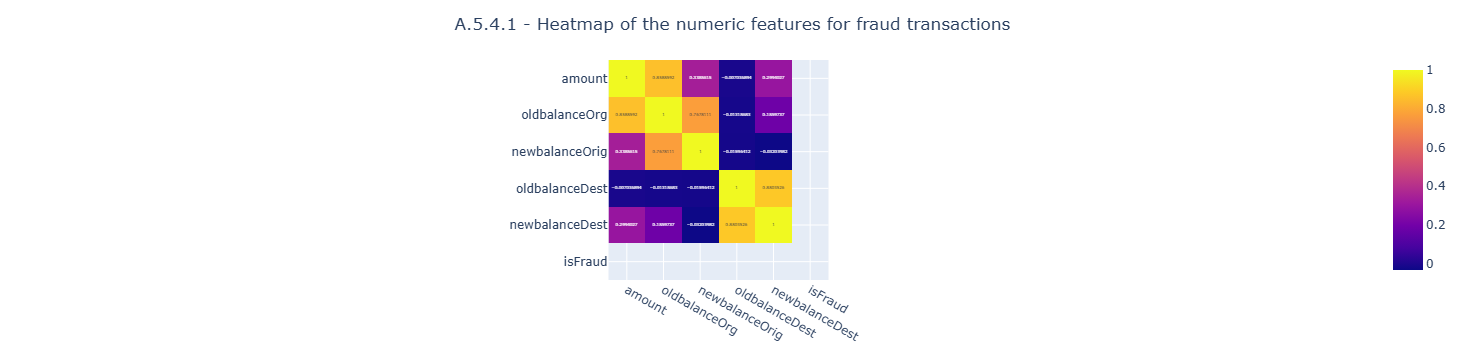

In [18]:
# A.5.4.1 Heatmap of the numeric features of fraud transaction dataset to explore corelation
df_fraud_numeric = fraud_df.select_dtypes(include=np.number)
df_fraud_numeric.drop('step', axis=1, inplace=True)
df_fraud_numeric.drop('isFlaggedFraud', axis=1, inplace=True)
#df_numeric = df_numeric.set_index('id')
fig = px.imshow(df_fraud_numeric.corr(), text_auto=True)
fig.update_layout(title={'text': 'A.5.4.1 - Heatmap of the numeric features for fraud transactions','x': 0.5,'xanchor': 'center'})
fig.write_image("images/A.5.4.1_heat_map_numeric_features_fraud_transactions.png")
fig.write_html("plots/A.5.4.1_heat_map_numeric_features_fraud_transactions.html")
fig.show()

### <mark>B. Data Preparation</mark>

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<b>Steps to prepare the data:</b>
1. We already know that <mark>there are no <b>missing values</b></mark> for any feature.
2. We will <mark><b>drop features</b> that are not useful for modeling</mark>: 
   - Features <b>nameOrig (Source Account Name)</b> and <b>nameDest (Destination Account Name)</b> are not relevant for modeling.
   - Feature <b>isFlaggedFraud (system was able to flag the transaction as fraud - 0/1)</b> is not relevant for modeling.
   - Feature <b>step (some portion of the time period)</b> is also not relevant for modeling.
3. We <mark>will not remove <b>outliers</b> in the data</mark> as for our use case (fraud detection) outlier data is very important.
4. We will <mark>transform <b>categorical feature 'type'</b> using <b>One-Hot Encoding</b></mark>.
5. We will <mark>transform <b>numeric features</b> usaing <b>StandardScaler</b></mark>.

<b>B.1 <mark>Creating modeling dataset</mark></b>

In [23]:
df_modeling = transaction_df.drop(['step','nameOrig','nameDest','isFlaggedFraud'], axis=1)
df_modeling

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


<b>B.2 <mark>Creating Training and Testing data</mark></b>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [25]:
# C.1 Creating the datasets for modeling
y = df_modeling['isFraud']
X = df_modeling.drop('isFraud', axis=1)

# Splitting the date into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.3)

In [26]:
numeric = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
categorical = ['type']

### <mark>C. Modeling</mark>

<mark>We will use <b>Logistic Regression</b> as our baseline model</mark>.

To <mark>manage the highly imbalanced dataset</mark> we will try three variations:
1. Logistic Regression with <b>Class Weighting</b> as Balanced
2. Logistic Regression with <b>Synthetic Minority Over-sampling Technique (SMOTE)</b>
3. Logistic Regression with <b>Stratified K-Fold cross-validation and SMOTE</b> within the cross-validation loop

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's Pipeline

<b>C.1 <mark>Logistic Regression with Class Weighting</mark></b>

In [28]:
# Create preprocessor
preprocessor = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)])

# Create pipeline with preprocessor and Logistic Regression model
pipeline = Pipeline([("prepocessor", preprocessor), ("model", LogisticRegression(class_weight = "balanced", max_iter = 1000, random_state=42))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prepocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('catigorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tran

In [29]:
# Predict using test data
y_predict = pipeline.predict(X_test)

# Generate Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [30]:
# Generate Confusion Matrix
confusion_matrix(y_test, y_predict)

array([[1804355,  101967],
       [    122,    2342]])

<b>C.2 <mark>Logistic Regression with <b>Synthetic Minority Over-sampling Technique (SMOTE)</mark></b>

In [31]:
# Create preprocessor with passthrough
preprocessor2 = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)], remainder='passthrough')

# Create SMOTE
smote = SMOTE(random_state=42)

# Create imblearn pipeline with preprocessor, SMOTE, and Logistic Regression model
pipeline2 = ImbPipeline([("prepocessor", preprocessor2), ('smote', smote), ("model", LogisticRegression(class_weight = "balanced", max_iter = 1000, random_state=42))])

# Fit the imblearn pipeline (ensure SMOTE is only applied to the training data)
pipeline2.fit(X_train, y_train)

,steps,"[('prepocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('catigorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready f

In [32]:
# Predict using test data
y_predict2 = pipeline2.predict(X_test)

# Generate Classification Report and compare with C.1 Classification Report
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.96      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [33]:
# Generate Confusion Matrix and compare with C.1 Confusion Matrix
confusion_matrix(y_test, y_predict2)

array([[1801089,  105233],
       [     98,    2366]])

<b>C.3 <mark>Logistic Regression with <b>Stratified K-Fold cross-validation and SMOTE</b> within the cross-validation loop</mark></b>

In [34]:
# Create preprocessor with passthrough
preprocessor3 = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)], remainder='passthrough')

# Create SMOTE
smote2 = SMOTE(random_state=42)

# Create imblearn pipeline with preprocessor, SMOTE, and Logistic Regression model
pipeline3 = ImbPipeline([("prepocessor", preprocessor3), ('smote', smote2), ("model", LogisticRegression(class_weight = "balanced", max_iter = 1000, random_state=42))])

# Configure Stratified k-Fold with 5 folds, shuffle = True for better results, and set a random state for reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipeline3, X, y, cv=skf, scoring='f1', n_jobs=-1) # n_jobs=-1 means using all available CPUs

# Print F1-scores for each fold and the mean and std
print(f"F1-scores for each fold: {scores}")
print(f"Mean F1-Score: {scores.mean():.2f} with standard deviation: {scores.std():.2f}")

F1-scores for each fold: [0.04334168 0.04550689 0.04240982 0.04455759 0.04478358]
Mean F1-Score: 0.04 with standard deviation: 0.00


### Observations

1. We see that even though our dataset is highly imbalanced the SMOTE and Stratified K-Fold cross-validation techniques did not produce better F1-score. <mark>In all three cases (Class Weighting, SMOTE, and Stratified K-Fold cross-validation with SMOTE) the F1-score for classifying fraud transactions is the same as 0.04</mark>.

2. Our baseline Logistic Regression model evaluation
- Very high <mark><b>Accuracy</b> of <b>0.95</b></mark> * Measures <b>overall correctness</b> but can be <mark>misleading in case of imbalanced classes like our dataset</mark>. It correctly classified 1,806,697 out of 1,908,786 total transactions in the test data.
  
- Very high <mark><b>Recall</b> of <b>0.95</b></mark> * Measure of <b>completeness</b> - Of all fraud transactions, how many did the model classify correctly? <mark>It correctly classified 2,342 out of 2,464 fraud transactions in the test data</mark>.

- Very low <mark><b>Precision</b> of <b>0.02</b></mark> * measure of <b>quality</b> - Of all fraud transactions classified by the model, how many were actually fraud? <mark>Out of the 104,309 transactions classified as fraud by the model in the test data, only 2,342 were actually fraud</mark>.

- Very low <mark><b>F1-Score</b> of <b>0.04</b></mark> * harmonic mean of Precision and Recall, combining them into one number. This is low because of very low Precision.

3. <mark><b>For fraud detection Recall is highly important</b></mark> as you need to catch all positive cases, even at the cost of relatively high false positives.

### Next Steps

1. We will build <b>Random Forest</b> model and <b>compare with the Logistic Regression<b> model we have built.
2. We will try <b>Isolation Forest</b> model (unsupervised learning) for <b>Anomaly Detection</b>.
3. If possible we will also try <b>Clustering<b>.